### **Módulo 2 | Modelos Preditivos**


**Enunciado**    
Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT). Para este desafio será utilizada uma versão modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository. Esse dataset contém um conjunto de
atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco). Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. 

**Objetivos**    
Exercitar os seguintes conceitos trabalhados no Módulo:
- Análise exploratória dos dados (EDA - Exploratory Data Analysis).
- Preparação dos dados.
- Comparação e ajuste de modelos de classificação.

### Análise dos Dados

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# carrega os dados para o google colab
from google.colab import files 
uploaded = files.upload()

In [ ]:
#visualizando os dados
wine = pd.read_csv("winequality-red.csv", sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Quantas instâncias e atributos possuem o dataset?**

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.shape

(1599, 12)

**Existem valores nulos?**

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# estatísticas do dataset 
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
nota5 = wine.query('quality == 5')
nota5.shape

(681, 12)

**Matriz de correlação**

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


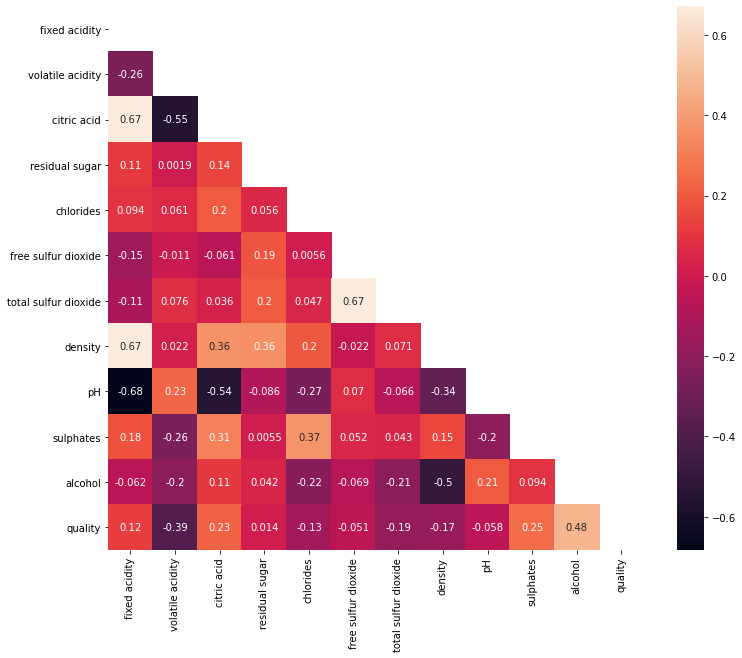

In [ ]:
# matriz plotada 
corr = wine.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True)
plt.show()

### Machine Learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# definindo os dados de entrada e saída 
X = wine.drop('quality', axis=1)
y = wine['quality']

In [ ]:
# normalização dos dados 
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [ ]:
# dados máximos existentes em cada variável
scaler.data_max_

array([ 15.9    ,   1.58   ,   1.     ,  15.5    ,   0.611  ,  72.     ,
       289.     ,   1.00369,   4.01   ,   2.     ,  14.9    ])

In [ ]:
# dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## KNN

In [ ]:
# KNN

clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN = clf_KNN.predict(X_test)

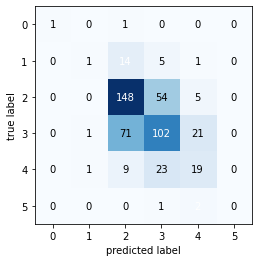

In [ ]:
# matriz de confusão para comparar o modelo criado
matriz_KNN = confusion_matrix(y_test, y_pred_KNN)
plot_confusion_matrix(matriz_KNN)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test, y_pred_KNN))


0.5645833333333333


## Decision Tree

In [ ]:
clf_tree = DecisionTreeClassifier()

clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

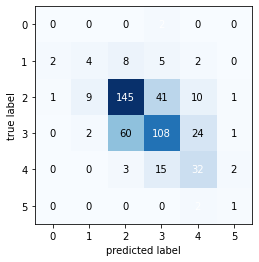

In [ ]:
#Avaliando o modelo 
matriz_tree = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_tree)
plt.show()

In [ ]:
clf_tree.score(X, y)

0.8811757348342715

In [ ]:
print(accuracy_score(y_test, y_pred))


0.6041666666666666


## Random Forest

In [ ]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=1)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [ ]:
clf_rf.score(X, y)

0.8736710444027517

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6791666666666667


## SVM

In [ ]:
clf_svm=SVC(gamma='auto',kernel='rbf')

clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)

In [ ]:
clf_svm.score(X, y)

0.5653533458411507

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5854166666666667


## MLP

In [ ]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

In [ ]:
clf_mlp.fit(X_train,y_train)
y_pred = clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
clf_mlp.score(X, y)

0.5822388993120701

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6


## Modificando o dataset    
Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. 

In [ ]:
wine2 = wine.copy()

# substituindo os dados 
wine2['quality'] = wine2['quality'].apply(lambda x: 0 if x<=5 else 1)
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# definindo os dados de entrada e saída 
X = wine2.drop('quality', axis=1)
y = wine2['quality']

In [ ]:
# normalização dos dados 
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [ ]:
# dividindo os dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=1)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8041666666666667


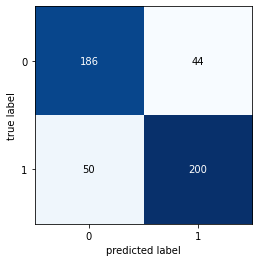

In [ ]:
# plot da matriz de confusão
matriz_rf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=matriz_rf)
plt.show()
